# [機械学習を理解するための数学のきほん](https://book.mynavi.jp/supportsite/detail/9784839963521.html)

## 回帰

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# 学習データを読み込む
train = np.loadtxt('./drive/My Drive/Colab Notebooks/機械学習を理解するための数学のきほん/click.csv', delimiter=',', dtype='int', skiprows=1)
# train = np.loadtxt('click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

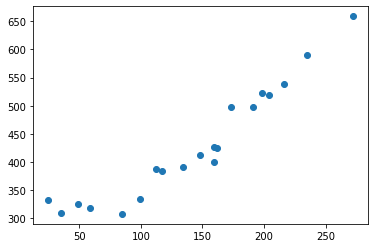

In [2]:
plt.plot(train_x, train_y, "o")

In [0]:
# パラメータを初期化
theta0 = np.random.rand()
theta1 = np.random.rand()

In [0]:
# 予測関数
def f(x):
    return theta0 + theta1 * x

In [0]:
# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [0]:
# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

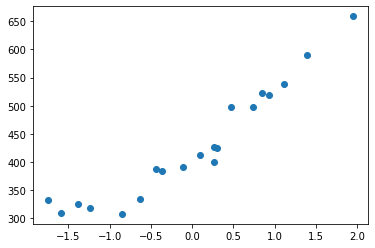

In [7]:
plt.plot(train_z, train_y, "o")

In [8]:
# 学習率
ETA = 1e-3

# 誤差の差分
diff = 1

# 更新回数
count = 0

# 誤差の差分が0.01以下になるまでパラメータ更新を繰り返す
error = E(train_z, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)

    # パラメータを更新
    theta0 = tmp_theta0
    theta1 = tmp_theta1

    # 前回の誤差との差分を計算
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error

    # ログの出力
    count += 1
    log = '{}回目: theta0 = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))

1回目: theta0 = 9.372, theta1 = 2.360, 差分 = 76081.3453
2回目: theta0 = 17.767, theta1 = 4.183, 差分 = 73068.5240
3回目: theta0 = 25.995, theta1 = 5.969, 差分 = 70175.0105
4回目: theta0 = 34.058, theta1 = 7.719, 差分 = 67396.0801
5回目: theta0 = 41.960, theta1 = 9.434, 差分 = 64727.1953
6回目: theta0 = 49.704, theta1 = 11.115, 差分 = 62163.9984
7回目: theta0 = 57.292, theta1 = 12.762, 差分 = 59702.3040
8回目: theta0 = 64.730, theta1 = 14.377, 差分 = 57338.0928
9回目: theta0 = 72.018, theta1 = 15.959, 差分 = 55067.5043
10回目: theta0 = 79.161, theta1 = 17.509, 差分 = 52886.8311
11回目: theta0 = 86.160, theta1 = 19.028, 差分 = 50792.5126
12回目: theta0 = 93.020, theta1 = 20.517, 差分 = 48781.1291
13回目: theta0 = 99.743, theta1 = 21.977, 差分 = 46849.3964
14回目: theta0 = 106.331, theta1 = 23.407, 差分 = 44994.1603
15回目: theta0 = 112.787, theta1 = 24.808, 差分 = 43212.3916
16回目: theta0 = 119.115, theta1 = 26.182, 差分 = 41501.1809
17回目: theta0 = 125.315, theta1 = 27.528, 差分 = 39857.7341
18回目: theta0 = 131.392, theta1 = 28.847, 差分 = 38279.3678
19

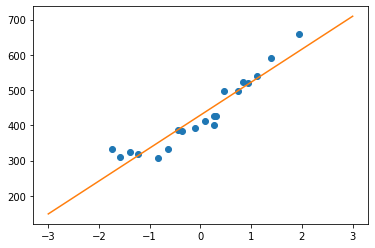

In [9]:
# プロットして確認
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))

## 検証

In [10]:
# 適当なxを入力してクリック数を予測
f(standardize(100))

370.9673619798094

In [11]:
f(standardize(200))

510.469909985022

In [12]:
f(standardize(300))

649.9724579902346

## 多項式回帰

In [0]:
# パラメータを初期化
theta = np.random.rand(3) # 3つの乱数

# 学習データの行列を作る
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x ** 2]).T

X = to_matrix(train_z)

In [36]:
theta

array([0.2373076 , 0.04686416, 0.66298634])

In [0]:
#train_z.shape
#np.vstack([np.ones(train_z.size), train_z, train_z ** 2])

(20,)

In [0]:
# 予測関数
def f(x):
    return np.dot(x, theta)

In [0]:
# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [39]:
# 学習率
ETA = 1e-3

# 誤差の差分
diff = 1

# 更新回数
count = 0

# 誤差の差分が0.01以下になるまでパラメータ更新を繰り返す
error = E(X, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    theta = theta - ETA * np.dot(f(X) - train_y, X)

    # 前回の誤差との差分を計算
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

    # ログの出力
    count += 1
    log = '{}回目: theta = {}, 差分 = {:.4f}'
    print(log.format(count, theta, diff))

1回目: theta = [8.80230172 1.91642191 9.62509121], 差分 = 153143.4898
2回目: theta = [17.01675386  3.76102059 18.02802426], 差分 = 137883.0760
3回目: theta = [24.8988583   5.58038368 25.90312396], 差分 = 124227.9014
4回目: theta = [32.46581865  7.37428371 33.27999918], 差分 = 112006.9699
5回目: theta = [39.73390229  9.1425388  40.18662434], 差分 = 101067.5616
6回目: theta = [46.71849176 10.88500954 46.64942951], 差分 = 91273.2775
7回目: theta = [53.43413334 12.60159595 52.69338536], 差分 = 82502.2936
8回目: theta = [59.89458296 14.2922347  58.34208358], 差分 = 74645.8013
9回目: theta = [66.11284963 15.95689644 63.61781278], 差分 = 67606.6153
10回目: theta = [72.10123638 17.59558335 68.54163029], 差分 = 61297.9302
11回目: theta = [77.87137905 19.20832675 73.13342994], 差分 = 55642.2100
12回目: theta = [83.43428287 20.79518494 77.41200613], 差分 = 50570.1969
13回目: theta = [88.80035709 22.35624113 81.39511441], 差分 = 46020.0259
14回目: theta = [93.97944766 23.89160149 85.09952867], 差分 = 41936.4339
15回目: theta = [98.98086813 25.40139334 88

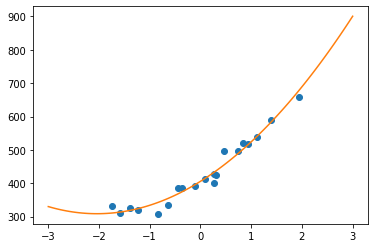

In [40]:
# プロットして確認
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()

## 平均二乗誤差の確認

In [0]:
# 平均二乗誤差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

In [0]:
# 学習率
ETA = 1e-3

# パラメタをランダムに初期化
theta = np.random.rand(3)

# 平均二乗誤差の履歴
errors = []

# 誤差の差分
diff = 1

# 学習を繰り返す
errors.append(MSE(X, train_y))
while diff > 1e-2:
    theta = theta - ETA*np.dot(f(X) - train_y, X)
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]

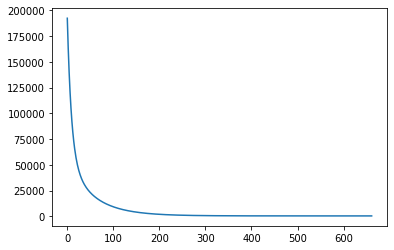

In [43]:
# 誤差をプロット
x = np.arange(len(errors))
plt.plot(x, errors)

## 確率的勾配降下法

In [0]:
# パラメタをランダムに初期化
theta = np.random.rand(3) # ランダムな数値を3つ作成

# 平均二乗誤差の履歴
errors = []

# 誤差の差分
diff = 1

In [0]:
# 学習を繰り替えす
errors.append(MSE(X, train_y))
while diff > 1e-2:
  # 学習データを並べ替えるためにランダムな順列を用意する
  p = np.random.permutation(X.shape[0])
  # 学習データをランダムに取り出して確率的勾配降下法でパラメタ更新
  for x, y in zip(X[p, :], train_y[p]):
    theta = theta - ETA*(f(x) - y)*x
  # 前回の誤差との差分を計算
  errors.append(MSE(X, train_y))
  diff = errors[-2] - errors[-1]

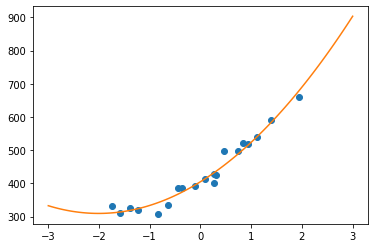

In [50]:
x = np.linspace(-3, 3, 100) # -3 から 3までを100刻みで

plt.plot(train_z, train_y, "o")
plt.plot(x, f(to_matrix(x)))

## パーセプトロン

In [0]:
# 学習データを読み込む
train = np.loadtxt('./drive/My Drive/Colab Notebooks/機械学習を理解するための数学のきほん/images1.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:, 0:2]
train_y = train[:, 2]

(2.4499999999999993, 520.55, 12.049999999999997, 494.95)

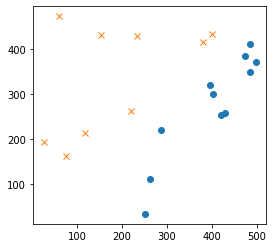

In [56]:
plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], "o")
plt.plot(train_x[train_y == -1, 0], train_x[train_y == -1, 1], "x")
plt.axis("scaled")

In [0]:
# 重みの初期化
w = np.random.rand(2)

In [0]:
# 識別関数
def f(x):
  if np.dot(w, x) >= 0:
    return 1
  else:
    return -1

In [60]:
# 繰り返し回数
epoch = 10

# 更新回数
count = 0

# 重みを学習する
for _ in range(epoch):
  for x, y in zip(train_x, train_y):
    if f(x) != y:
      w = w + y*x
      # ログの出力
      count += 1
      print("{}回目: w = {}".format(count, w))

1回目: w = [-152.46301891 -431.64246856]
2回目: w = [321.53698109 -47.64246856]
3回目: w = [  88.53698109 -477.64246856]
4回目: w = [ 484.53698109 -156.64246856]
5回目: w = [  85.53698109 -589.64246856]
6回目: w = [ 488.53698109 -289.64246856]
7回目: w = [ 109.53698109 -705.64246856]
8回目: w = [ 372.53698109 -593.64246856]
9回目: w = [ 846.53698109 -209.64246856]
10回目: w = [ 613.53698109 -639.64246856]


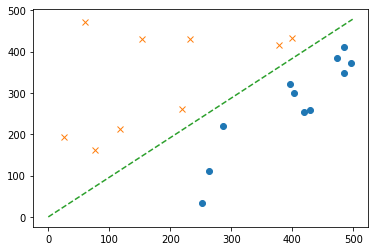

In [62]:
x1 = np.arange(0, 500)

plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], "o")
plt.plot(train_x[train_y == -1, 0], train_x[train_y == -1, 1], "x")

plt.plot(x1, -w[0] / w[1] * x1, linestyle = "dashed")

## ロジスティック回帰

In [0]:
# 学習データを読み込む
train = np.loadtxt('./drive/My Drive/Colab Notebooks/機械学習を理解するための数学のきほん/images2.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:, 0:2]
train_y = train[:, 2]

In [0]:
# パラメタを初期化
theta = np.random.rand(3)

# 標準化
mu = train_x.mean(axis=0)
siguma = train_x.std(axis=0)

def standardize(x):
  return (x - mu)/siguma

train_z = standardize(train_x)

In [0]:
# x0を加える
def to_matrix(x):
  x0 = np.ones([x.shape[0], 1])
  return np.hstack([x0, x])

In [0]:
X = to_matrix(train_z)

In [72]:
X

array([[ 1.        , -0.99163844,  1.10606278],
       [ 1.        , -0.54781896, -0.33533755],
       [ 1.        , -1.22348444, -0.74232117],
       [ 1.        ,  1.13472054,  0.69907916],
       [ 1.        ,  1.20758642,  0.92800744],
       [ 1.        , -0.46170474,  1.08910513],
       [ 1.        ,  0.61803518,  0.16491315],
       [ 1.        ,  1.20096225,  0.40232027],
       [ 1.        ,  0.83663283, -0.36077402],
       [ 1.        , -0.11062366, -0.69144821],
       [ 1.        ,  0.63790769,  1.1145416 ],
       [ 1.        ,  0.66440438, -0.01314218],
       [ 1.        , -0.33584548, -2.26850974],
       [ 1.        ,  1.28707648,  0.59733325],
       [ 1.        ,  0.50542427,  0.97040157],
       [ 1.        , -1.50169963, -1.17474126],
       [ 1.        , -0.2629796 , -1.60716136],
       [ 1.        , -1.83290819, -0.9203765 ],
       [ 1.        , -1.6010622 ,  1.45369462],
       [ 1.        ,  0.77701529, -0.41164697]])

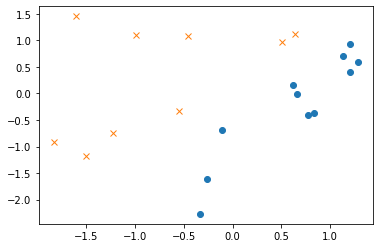

In [73]:
# 標準化したデータをプロット
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], "o")
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], "x")

In [0]:
# シグモイド関数
def f(x):
  return 1 / (1 + np.exp(-np.dot(x, theta)))

In [0]:
# 学習率
ETA = 1e-3

# 繰り返し回数
epoch = 5000

# 学習を繰り返す
for _ in range(epoch):
  theta = theta - ETA * np.dot(f(X) - train_y, X)

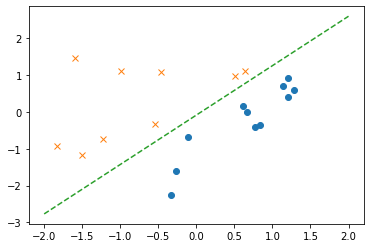

In [77]:
x1 = np.linspace(-2, 2, 100)

plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], "o")
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], "x")
plt.plot(x1, -(theta[0] + theta[1] * x1) / theta[2], linestyle = "dashed")

## 線形分離不可能な分類を実装する

In [0]:
# 学習データを読み込む
train = np.loadtxt('./drive/My Drive/Colab Notebooks/機械学習を理解するための数学のきほん/data3.csv', delimiter=',', skiprows=1)
train_x = train[:, 0:2]
train_y = train[:,2]

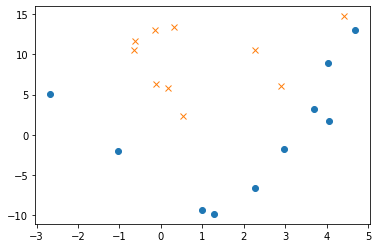

In [25]:
plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], "o")
plt.plot(train_x[train_y == 0, 0], train_x[train_y == 0, 1], "x")

In [0]:
# パラメタを初期化
theta = np.random.rand(4)

# 標準化
mu = train_x.mean(axis=0)
sigma = train_x.std(axis=0)

def standardize(x):
  return (x - mu)/ sigma

train_z = standardize(train_x)

In [0]:
# x0とx3を加える
def to_matrix(x):
  x0 = np.ones([x.shape[0], 1]) # (20, 1)
  x3 = x[:, 0, np.newaxis]**2 # np.newaxisは新たな次元を追加するのに使う (20, 1)
  return np.hstack([x0, x, x3])

In [0]:
X = to_matrix(train_z)

In [32]:
X

array([[ 1.        , -0.44944473, -0.33683293,  0.20200057],
       [ 1.        , -0.55531156,  1.159749  ,  0.30837093],
       [ 1.        ,  1.44118758,  1.33672077,  2.07702165],
       [ 1.        ,  0.73721961, -0.89894535,  0.54349276],
       [ 1.        ,  1.24414813,  0.54901867,  1.54790456],
       [ 1.        ,  0.38919528, -1.54626023,  0.15147297],
       [ 1.        , -2.01242332,  0.02891696,  4.04984761],
       [ 1.        , -1.21882399, -0.91761041,  1.48553193],
       [ 1.        ,  1.26384764, -0.42276277,  1.59731086],
       [ 1.        ,  0.69273399,  0.16624619,  0.47988039],
       [ 1.        ,  0.39020134,  0.77730682,  0.15225709],
       [ 1.        ,  1.56462593,  1.10316317,  2.4480543 ],
       [ 1.        , -0.09212323, -1.98170949,  0.00848669],
       [ 1.        , -0.78722946,  1.10107323,  0.61973022],
       [ 1.        , -1.03197838,  0.77680451,  1.06497939],
       [ 1.        ,  1.08275847, -0.21442519,  1.17236591],
       [ 1.        , -1.

In [0]:
# シグモイド関数
def f(x):
  return 1 / (1 + np.exp(-np.dot(x, theta)))

# 学習率
ETA = 1e-3

# 繰り返し回数
epoch = 5000

# 学習を繰り返す
for _ in range(epoch):
  theta = theta - ETA * np.dot(f(X) - train_y, X)

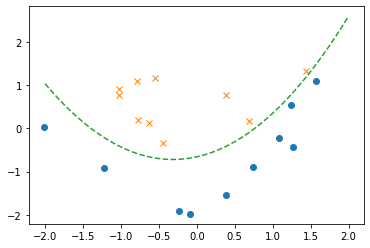

In [42]:
x1 = np.linspace(-2, 2, 100)
x2 = -(theta[0] + theta[1] * x1 + theta[3] * x1 ** 2) / theta[2]

plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], "o")
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], "x")
plt.plot(x1, x2, linestyle = "dashed")

### 精度の確認

In [0]:
# パラメタを初期化
theta = np.random.rand(4)

# 精度の履歴
accuracies = []

# 分類関数
def classify(x):
  return (f(X) >= 0.5).astype(np.int)

# 学習を繰り返す
for _ in range(epoch):
  theta = theta  - ETA * np.dot(f(X) - train_y, X)
  # 現在の精度を計算
  result = classify(X) == train_y
  accuracy = len(result[result == True]) / len(result)
  accuracies.append(accuracy)

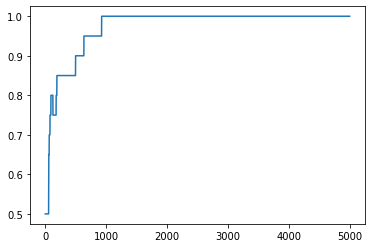

In [46]:
# 精度をプロット
x = np.arange(len(accuracies))
plt.plot(x, accuracies)

### 確率的勾配降下法の実装

In [0]:
# パラメタを初期化
theta = np.random.rand(4)

# 学習を繰り返す
for _ in range(epoch):
  # 確率的勾配降下法でパラメタ更新
  p = np.random.permutation(X.shape[0])
  for x, y in zip(X[p, :], train_y[p]):
    theta = theta - ETA * (f(x) - y) * x

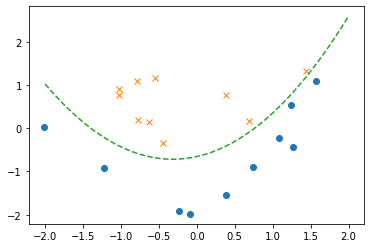

In [49]:
x1 = np.linspace(-2, 2, 100)
x2 = -(theta[0] + theta[1] * x1 + theta[3] * x1 ** 2) / theta[2]

plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], "o")
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], "x")
plt.plot(x1, x2, linestyle = "dashed")

# 正則化
## 学習データの確認

(-1.0, 2.0)

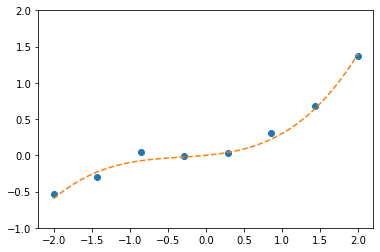

In [62]:
# 真の関数
def g(x):
  return 0.1 * (x**3 + x**2 + x)

# 真の関数にノイズを加えた学習データを必要な数だけ用意する
train_x = np.linspace(-2, 2, 8)
train_y = g(train_x) + np.random.randn(train_x.size) * 0.05

# プロットして確認
x = np.linspace(-2, 2, 100)
plt.plot(train_x, train_y, "o")
plt.plot(x, g(x), linestyle = "dashed")
plt.ylim(-1, 2)

In [0]:
# 10次の多項式で学習してみる
# まずは学習データの行列を作って、予測関数を定義するまで

# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
  return (x - mu)/sigma

train_z = standardize(train_x)

In [0]:
# 学習データの行列を作る
def to_matrix(x):
  return np.vstack([
                    np.ones(x.size),
                    x,
                    x**2,
                    x**3,
                    x**4,
                    x**5,
                    x**6,
                    x**7,
                    x**8,
                    x**9,
                    x**10
  ]).T

In [0]:
X = to_matrix(train_z)

In [0]:
# パラメタの初期化
theta = np.random.randn(X.shape[1])

# 予測関数
def f(x):
  return np.dot(x, theta)

## 正則化を適用しない実装

In [0]:
# 目的関数
def E(x, y):
  return 0.5 * np.sum( (y - f(x))**2 )

# 学習率
ETA = 1e-4

# 誤差
diff = 1

# 学習を繰り返す
error = E(X, train_y)
while diff > 1e-6:
  theta = theta - ETA * np.dot( f(X) - train_y, X)
  current_error = E(X, train_y)
  diff = error - current_error
  error = current_error

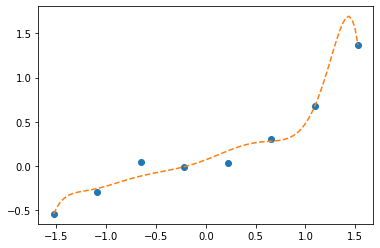

In [72]:
# 結果をプロット
z = standardize(x) # xは先程np.linspaceで作った目盛り
plt.plot(train_z, train_y, "o")
plt.plot(z, f(to_matrix(z)), linestyle = "dashed") # 曲線
# 過学習が起きている状態

## 正則化を適用した実装

In [0]:
# 正則化なしのパラメタを保存して再度パラメタを初期化
theta1 = theta
theta = np.random.randn(X.shape[1])

# 正則化定数
LAMBDA = 1

# 誤差の差分
diff = 1

# 学習を繰り返す(正則化項つき)
error = E(X, train_y)

# 誤差の差分が1e-6以下になるまでパラメータ更新を繰り返す
while diff > 1e-6:
  # 正則化項。バイアス項は正則化を適用しないので0にする
  reg_term = LAMBDA * np.hstack([ 0, theta[1:] ])
  # 正則化項を適用してパラメタを更新する
  theta = theta - ETA*(np.dot( f(X) - train_y, X ) + reg_term )
  current_error = E(X, train_y)
  diff = error - current_error
  error = current_error

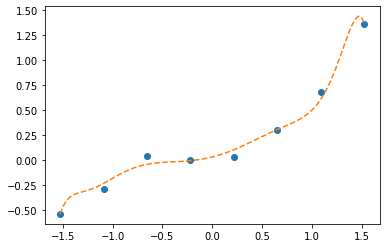

In [79]:
# 結果をプロット
plt.plot(train_z, train_y, "o")
plt.plot(z, f(to_matrix(z)), linestyle = "dashed")

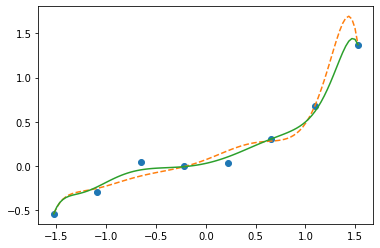

In [80]:
# 正則化ありのパラメタを保存
theta2 = theta

plt.plot(train_z, train_y, "o")

# 正則化なしの結果をプロット
theta = theta1
plt.plot(z, f(to_matrix(z)), linestyle="dashed")

# 正則化ありの結果をプロット
theta = theta2
plt.plot(z, f(to_matrix(z)))

In [76]:
np.hstack( [5, np.arange(1, 8)] )

array([5, 1, 2, 3, 4, 5, 6, 7])